In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
series = pd.read_csv("G:/data sceince/Python/Forecasting/daily-minimum-temperatures.csv",header = 0, index_col = 0, parse_dates = True)     # In order to have date columns as index we will give parse dates = True

In [4]:
series

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


<Figure size 1080x576 with 0 Axes>

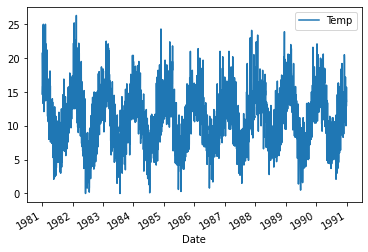

In [7]:
# Line plot
plt.figure(figsize = (15,8))
series.plot()
plt.show()

Inference: From this plot we can infer that our data is having a constant trend and additive seasonality component.

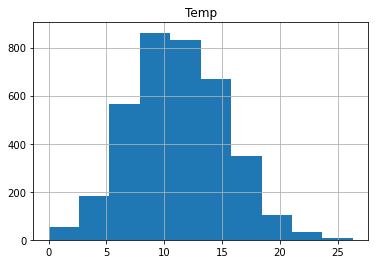

In [8]:
# Histogram

series.hist()
plt.show()

Inference : From this plot we can infer that our data is normally distributed

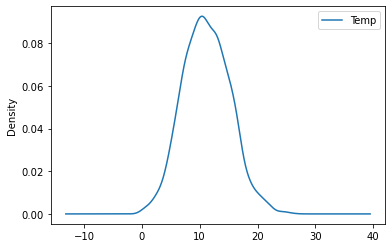

In [10]:
# Density plot

series.plot(kind = 'kde')
plt.show()

Inference : From this plot also we can infer that our data is normally distributed

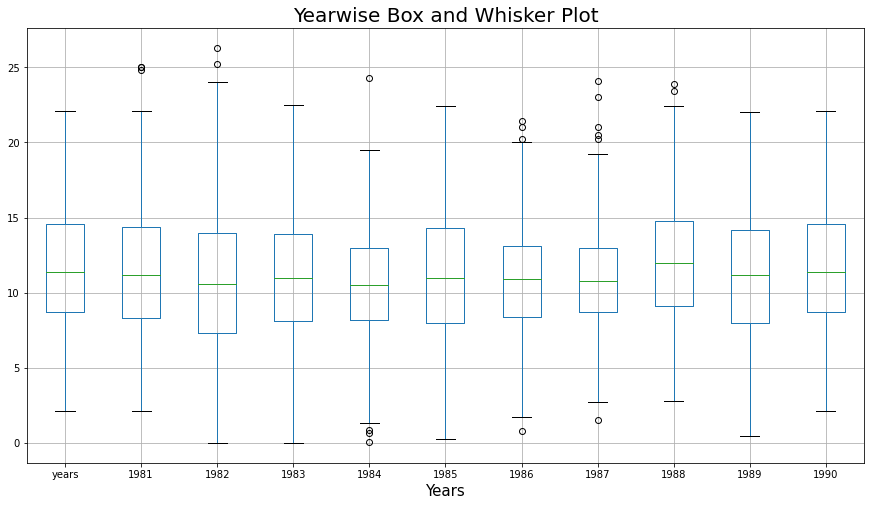

In [38]:
# Box and Whisker plots 
# Creating the box plot on year wise data

from pandas import Grouper
groups = series.groupby(Grouper(freq = 'A'))         # Freq = 'A' represents year, grouping the data yearwise from the series
years = pd.DataFrame(group.values, columns = ['years'])
for name, group in groups:
    years[name.year] = group.values
plt.figure(figsize = (15,8))
plt.xlabel("Years", fontsize = 15)
plt.title("Yearwise Box and Whisker Plot", fontsize = 20)
years.boxplot()
plt.show()
    

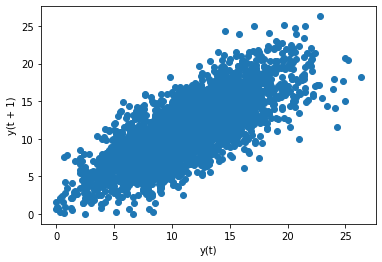

In [40]:
# Lag plot
from pandas.plotting import lag_plot
lag_plot(series)                      # By default it will consider 1 lag
plt.show()

Inference : From this we can infer that there is a strong relationship between the output and lagged output

<Figure size 1080x576 with 0 Axes>

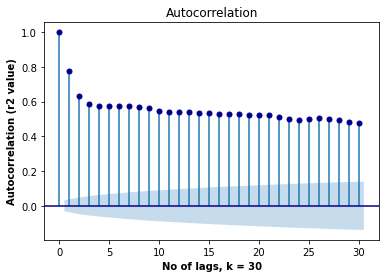

In [55]:
# ACF plot(Autocorrealtion function plot)

from statsmodels.graphics.tsaplots import plot_acf                       # tsa(time series analysis plot)
plt.figure(figsize = (15,8))
plot_acf(series, lags = 30, color = 'darkblue')                                              # lags = 30 means it will plot for k = 30 lags 
plt.xlabel("No of lags, k = 30", size = 10, weight = 'bold')
plt.ylabel("Autocorrelation (r2 value)", size = 10, weight = 'bold')
plt.show()

Obviously there will be maximum correlation of a particular value with itself hence it is showing maximum correlation value for 0